## 📌 Lecture 7: Categorical Encoding

### Key Learning Objectives:
1. Understand different encoding techniques  
2. Learn when to use each encoding method  
3. Handle high-cardinality categories  
4. Implement target-based encoding  

---

### **Why Use Categorical Encoding?**
- Machine learning models require numerical input.
- Encoding techniques allow categorical variables to be represented numerically.
- Choosing the right encoding method affects model performance.

---

### **Types of Categorical Encoding Methods:**

#### **1. One-Hot Encoding (OHE)**
Creates binary columns for each category.
$$
X_{i,j} =
\begin{cases}
1, & \text{if } x_i \text{ belongs to category } j \\
0, & \text{otherwise}
\end{cases}
$$

#### **2. Label Encoding**  
Assigns unique integer values to each category.
$$
X' = \{0, 1, 2, ... , n-1\}
$$

#### **3. Ordinal Encoding**  
Used when categories have an inherent order.
$$
X' = \{1, 2, 3, ... , k\}
$$
where \($ k $) represents the order of the category.

#### **4. Target Encoding (Mean Encoding)**  
Encodes categories based on the mean of the target variable.
$$
X' = \frac{\sum Y_{i}}{n}
$$
where \($ Y_i $) is the target value for each category.

#### **5. Frequency Encoding**  
Encodes categories based on their occurrence in the dataset.
$$
X' = \frac{\text{Count of category } X}{\text{Total observations}}
$$

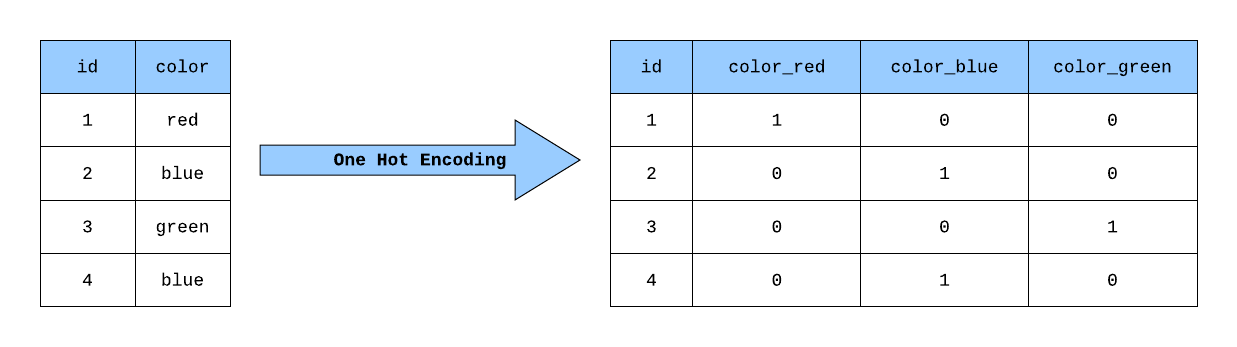

# 📌 Import necessary libraries

In [1]:
# 📌 Import necessary libraries
import pandas as pd  # Data handling
import numpy as np  # Mathematical operations
import matplotlib.pyplot as plt  # Visualization
import seaborn as sns  # Beautiful statistical plots
import warnings
# Ignore FutureWarnings (e.g., deprecation warnings from Seaborn)
warnings.simplefilter(action='ignore', category=FutureWarning)

# 📌 Import encoding modules for categorical data processing
from sklearn.preprocessing import (
    LabelEncoder,  # Converts categorical labels to numeric values
    OneHotEncoder,  # One-Hot Encoding
    OrdinalEncoder,  # Encodes categories while maintaining order
    TargetEncoder  # Target Encoding (if available in your setup)
)

In [2]:
# 📌 Load the dataset
df = pd.read_csv('loan_applications.csv')
print("✅ Dataset successfully loaded!")
print(df.head())  # Display the first few rows of the dataset

✅ Dataset successfully loaded!
   application_id application_date  age gender    education     occupation  \
0               1       2020-01-05   40      M       Master  Self-employed   
1               2       2020-05-21   33      M     Bachelor       Salaried   
2               3       2020-09-24   42      F     Bachelor     Unemployed   
3               4       2020-05-10   53      F  High School       Salaried   
4               5       2020-05-15   32      M       Master       Salaried   

   employment_length    income  loan_amount  loan_term  interest_rate  \
0          13.573526  40298.38     95254.57         48          10.95   
1           3.061310  38167.11    140514.31         60          17.12   
2          12.040059   8666.27     13340.61         60          11.89   
3           8.490862  33093.00     73008.42         60          12.89   
4           0.782913  41115.42     51399.26         12           7.58   

   monthly_payment  credit_score  existing_loans  previous_de

In [3]:
# 📌 Identify categorical columns for encoding
categorical_features = ['education', 'occupation', 'city', 'gender']
df_encoded = df.copy()  # Create a copy of the dataset for encoding

In [4]:
# 📌 1️⃣ Label Encoding for ordered categorical data
print("🔠 Applying Label Encoding for the 'education' feature")

# Define the order for education categories (from lowest to highest)
education_order = ['High School', 'Bachelor', 'Master', 'PhD']

# Create a LabelEncoder object
le = LabelEncoder()

# Encode the 'education' feature based on the predefined order
df_encoded['education_label'] = pd.Categorical(
    df_encoded['education'],
    categories=education_order,  # Maintain the specified order
    ordered=True  # Indicate that order matters
).codes  # Convert categories to numeric codes

# 📌 Display the encoded feature results
print("🎓 Label Encoding applied to 'education':")
print(df_encoded[['education', 'education_label']].head())


🔠 Applying Label Encoding for the 'education' feature
🎓 Label Encoding applied to 'education':
     education  education_label
0       Master                2
1     Bachelor                1
2     Bachelor                1
3  High School                0
4       Master                2


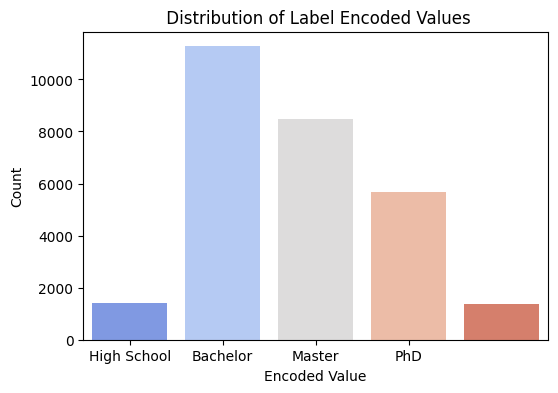

In [6]:
# 📌 Visualizing the distribution of encoded values
plt.figure(figsize=(6, 4))
sns.countplot(x=df_encoded['education_label'], palette='coolwarm')
plt.title(" Distribution of Label Encoded Values")
plt.xlabel("Encoded Value")
plt.ylabel("Count")
plt.xticks(ticks=[0, 1, 2, 3], labels=education_order)
plt.show()

#🔥 2. One-Hot Encoding (for nominal categories)

In [7]:
import pandas as pd  # 📊 Data manipulation library
import numpy as np  # 🔢 Numerical computations
import matplotlib.pyplot as plt  # 📈 Visualization
import seaborn as sns  # 🎨 Advanced visualization
from sklearn.preprocessing import OneHotEncoder, LabelEncoder  # 🏷️ Encoding tools

# 📥 Load the dataset
df = pd.read_csv('loan_applications.csv')

# 🎯 Identify categorical features
categorical_features = ['education', 'occupation', 'city', 'gender']
df_encoded = df.copy()

# 🏷️ 1. Label Encoding (for ordinal categories)
education_order = ['High School', 'Bachelor', 'Master', 'PhD']  # 🎓 Define education hierarchy
df_encoded['education_label'] = pd.Categorical(
    df['education'], categories=education_order, ordered=True).codes

# 🔍 Check transformation
print("🏷️ Label Encoding Result: \n", df_encoded[['education', 'education_label']].head())

# 🔥 2. One-Hot Encoding (for nominal categories)
ohe = OneHotEncoder(sparse_output=False)  # 🔄 Convert categorical to numerical
nominal_features = ['occupation', 'city']
encoded_nominal = ohe.fit_transform(df[nominal_features])
encoded_feature_names = ohe.get_feature_names_out(nominal_features)
df_nominal_encoded = pd.DataFrame(encoded_nominal, columns=encoded_feature_names, index=df.index)

# 🛠️ Merge with original dataset
df_new = pd.concat([df.drop(columns=nominal_features), df_nominal_encoded], axis=1)

# 🏷️ 3. Binary Encoding (for gender)
df_encoded['gender_binary'] = (df['gender'] == 'Male').astype(int)

# ✅ Display final transformed dataset
print("🔹 Transformed Dataset Preview: \n", df_encoded.head())

# 📌 Gender Binary Encoding Explanation
# The column 'gender_binary' is created to represent gender in a numerical format:
# - 0️⃣ (Female)  -> Represents female individuals
# - 1️⃣ (Male)    -> Represents male individuals
print("\n✅ Gender Binary Encoding Mapping:")
print("  0️⃣ -> Female")
print("  1️⃣ -> Male")

# 🔢 Display the count of each category in 'gender_binary'
# This helps verify if the dataset has a balanced or imbalanced gender distribution
print("\n📊 Gender Binary Encoding Value Counts:")
print(df_encoded['gender_binary'].value_counts())

# 📊 Show the updated plot
plt.show()
# ✅ Display final transformed dataset
print("🔍 Transformed Dataset Preview: \n", df_encoded.head())


🏷️ Label Encoding Result: 
      education  education_label
0       Master                2
1     Bachelor                1
2     Bachelor                1
3  High School                0
4       Master                2
🔹 Transformed Dataset Preview: 
    application_id application_date  age gender    education     occupation  \
0               1       2020-01-05   40      M       Master  Self-employed   
1               2       2020-05-21   33      M     Bachelor       Salaried   
2               3       2020-09-24   42      F     Bachelor     Unemployed   
3               4       2020-05-10   53      F  High School       Salaried   
4               5       2020-05-15   32      M       Master       Salaried   

   employment_length    income  loan_amount  loan_term  interest_rate  \
0          13.573526  40298.38     95254.57         48          10.95   
1           3.061310  38167.11    140514.31         60          17.12   
2          12.040059   8666.27     13340.61         60     

# PART 2: Handling High Cardinality

📊 **Dealing with categorical variables that have many unique values.**  

### **Why is high cardinality a problem?**
- Creates a high-dimensional feature space, leading to overfitting.  
- Increases memory and computational costs.  
- Makes One-Hot Encoding impractical.

---

### **Alternative Encoding Techniques**

#### **1. Frequency Encoding**
Encodes each category based on its occurrence in the dataset.
$$
X' = \frac{\text{Count of category } X}{\text{Total observations}}
$$

#### **2. Target Encoding (Mean Encoding)**
Encodes categories based on the mean target value.
$$
X' = \frac{\sum Y_{i}}{n}
$$
where \($ Y_i $) is the target value for each category.

#### **3. Hash Encoding**
Uses a hashing function to map categories into fixed-length numerical representations.
$$
X' = \text{hash}(X) \mod k
$$
where \($ k $) is the chosen number of output features.

#### **4. Principal Component Analysis (PCA) on Encoded Features**
Reduces dimensionality after encoding categories, preserving only the most important featureson

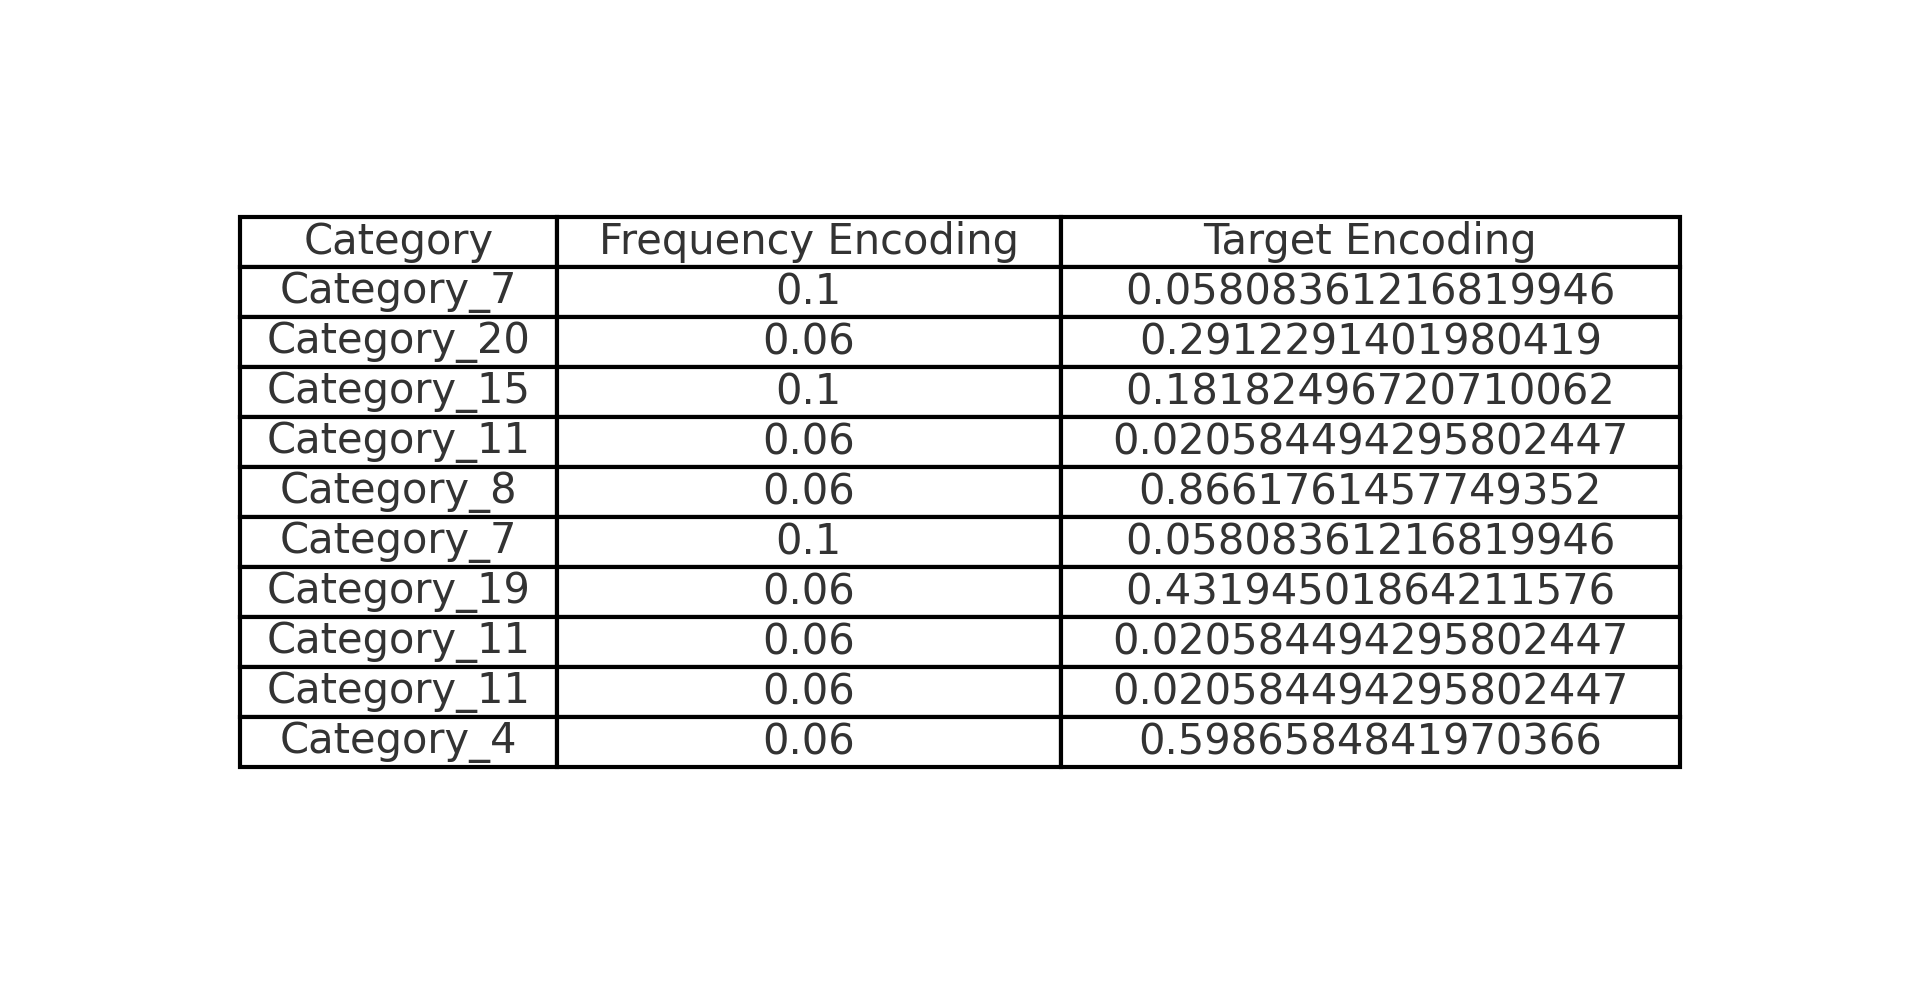

# 📌 Frequency-based Encoding (Categorical Features)

In [8]:
# 📌 Frequency-based Encoding (Categorical Features)
# This method replaces each category with the count of its occurrences in the dataset.
# It helps models understand the importance of a category based on its frequency.

# ✅ Define categorical features to encode
categorical_features = ['occupation', 'city']

# 🔄 Apply frequency encoding to each categorical feature
for feature in categorical_features:
    # 🔢 Get value counts (how many times each category appears)
    value_counts = df[feature].value_counts()

    # 🖨️ Print the top 5 most common categories for insight
    print(f"\n📊 Frequency Encoding for: {feature}")
    print(value_counts.head())

    # 🔄 Map frequencies back to the dataframe
    df_encoded[f'{feature}_freq'] = df[feature].map(value_counts)




📊 Frequency Encoding for: occupation
occupation
Salaried         24978
Self-employed    10049
Business          7461
Student           2515
Unemployed        2512
Name: count, dtype: int64

📊 Frequency Encoding for: city
city
CITY_50    2217
CITY_90    1990
CITY_68    1766
CITY_12    1592
CITY_44    1522
Name: count, dtype: int64


# ✅ Print dataset preview after encoding

In [9]:
# ✅ Print dataset preview after encoding
print("\n🚀 Transformed Dataset Preview (Top 5 rows):")
print(df_encoded.head())


🚀 Transformed Dataset Preview (Top 5 rows):
   application_id application_date  age gender    education     occupation  \
0               1       2020-01-05   40      M       Master  Self-employed   
1               2       2020-05-21   33      M     Bachelor       Salaried   
2               3       2020-09-24   42      F     Bachelor     Unemployed   
3               4       2020-05-10   53      F  High School       Salaried   
4               5       2020-05-15   32      M       Master       Salaried   

   employment_length    income  loan_amount  loan_term  ...  monthly_payment  \
0          13.573526  40298.38     95254.57         48  ...          2459.46   
1           3.061310  38167.11    140514.31         60  ...          3501.53   
2          12.040059   8666.27     13340.61         60  ...           296.01   
3           8.490862  33093.00     73008.42         60  ...          1657.01   
4           0.782913  41115.42     51399.26         12  ...          4461.24   

   cr

In [10]:
# 🚀 Top-K Encoding with "Other" Category
# This encoding keeps only the top K most frequent categories and assigns "Other" to the rest.

def top_k_encoding(series, k=10):
    """
    ✅ Function to apply Top-K encoding:
    - Keeps only the top K most frequent categories.
    - Replaces all other categories with "Other".

    🔹 Parameters:
        - series: Pandas Series (categorical column)
        - k: Number of top categories to keep

    🔹 Returns:
        - Transformed Series with Top-K categories and "Other"
    """

    # 📊 Compute category frequency
    value_counts = series.value_counts()

    # 🔝 Select top-K categories
    top_k = value_counts.nlargest(k).index

    # 🔄 Map categories: Keep Top-K, replace others with "Other"
    return series.map(lambda x: x if x in top_k else 'Other')

# 🏙️ Apply Top-K encoding to "city"
df_encoded['city_top_k'] = top_k_encoding(df['city'])

# 💼 Apply Top-K encoding to "occupation"
df_encoded['occupation_top_k'] = top_k_encoding(df['occupation'])

# 🖨️ Display the transformed dataset (Top 5 rows)
print("\n🚀 Transformed Dataset Preview (Top 5 rows):")
print(df_encoded[['city_top_k', 'occupation_top_k']].head())



🚀 Transformed Dataset Preview (Top 5 rows):
  city_top_k occupation_top_k
0    CITY_22    Self-employed
1    CITY_41         Salaried
2    CITY_68       Unemployed
3      Other         Salaried
4      Other         Salaried


# 🏆 Display the top-K categories for verification

In [11]:
# 🏆 Display the top-K categories for verification
print("\n🏙️ Top-K Categories for City:")
print(df_encoded['city_top_k'].value_counts())

print("\n💼 Top-K Categories for Occupation:")
print(df_encoded['occupation_top_k'].value_counts())


🏙️ Top-K Categories for City:
city_top_k
Other      34341
CITY_50     2217
CITY_90     1990
CITY_68     1766
CITY_12     1592
CITY_44     1522
CITY_78     1507
CITY_28     1349
CITY_22     1244
CITY_41     1237
CITY_14     1235
Name: count, dtype: int64

💼 Top-K Categories for Occupation:
occupation_top_k
Salaried         24978
Self-employed    10049
Business          7461
Student           2515
Unemployed        2512
Retired           2485
Name: count, dtype: int64


# 🏆 Section 7: Categorical Encoding Techniques

## 🎯 Key Learning Objectives:
1. **Understand Different Encoding Methods** 🧠  
   - Learn various ways to transform categorical data into numerical representations.
   
2. **Apply Proper Encoding for Different Data Types** 🔄  
   - Choose the right encoding technique based on the type of categorical variable (ordinal, nominal, high-cardinality).
   
3. **Implement Multiple Encoding Techniques** 🔢  
   - Master techniques such as **Label Encoding, One-Hot Encoding, Binary Encoding, Frequency Encoding, and Target Encoding**.
   
4. **Evaluate Encoding Impact on Machine Learning Models** 📊  
   - Analyze how different encodings affect model performance and data usability.

---

## 🛠️ Encoding Techniques Covered:

### 1️⃣ **Label Encoding (For Ordinal Data)**
   - Converts categorical values into **integer labels**.
   - Suitable for **ordered** categories (e.g., Education Level: High School → Bachelor → Master → PhD).
   
### 2️⃣ **One-Hot Encoding (For Nominal Data)**
   - Creates **binary columns** for each category.
   - Works well for categorical features with **low cardinality**.

### 3️⃣ **Binary Encoding (Alternative to One-Hot)**
   - Converts categories into **binary representation**.
   - Reduces dimensionality compared to one-hot encoding.

### 4️⃣ **Frequency Encoding**
   - Replaces categories with their **occurrence count**.
   - Useful for **handling categorical variables with many unique values**.

### 5️⃣ **Target Encoding (Mean Encoding)**
   - Replaces categories with the **mean of the target variable**.
   - Often used in **supervised learning tasks**.

### 6️⃣ **Top-K Encoding**
   - Keeps the **most frequent K categories** and groups the rest as **"Other"**.
   - Prevents excessive feature expansion for high-cardinality features.

---

## ✅ **Why Categorical Encoding Matters?**
- 🚀 Improves **model interpretability** and **performance**.
- 🎯 Helps **handle categorical variables** effectively in machine learning.
- 🔍 Avoids **data leakage** and **overfitting** with proper encoding strategies.

---

## 🔥 **Next Steps**
- Experiment with **different encoding methods** in various datasets.
- Analyze how different encodings impact **machine learning models**.
- Optimize encoding strategies based on **dataset characteristics**.